In [44]:
import pandas as pd

In [45]:
df34 = pd.read_csv('to_analyze34.csv')

# Keep only the specified features
df34_clean = df34.loc[:, ['speechiness', 'danceability', 'acousticness', 'valence', 'energy', 'label']]


In [46]:
df34_clean

,speechiness,danceability,acousticness,valence,energy,label
0,0.0544,0.731,0.4010,0.1450,0.5730,1
1,0.0369,0.700,0.2210,0.7560,0.7220,1
2,0.0993,0.746,0.0112,0.7370,0.7650,1
3,0.3750,0.935,0.0194,0.3570,0.4540,1
4,0.0878,0.737,0.4680,0.6820,0.8020,1
...,...,...,...,...,...,...
170648,0.0350,0.224,0.9920,0.0696,0.0082,0
170649,0.9120,0.700,0.1530,0.4910,0.1760,0
170650,0.1200,0.517,0.9770,0.4440,0.2540,0
170651,0.9130,0.699,0.1610,0.6120,0.2380,0


In [47]:
#Scaled KNN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

precision = precision_score(y_test, y_test_pred)
print("Precision: ", precision)
recall = recall_score(y_test, y_test_pred)
print("Recall: ", recall)
f1 = f1_score(y_test, y_test_pred)
print("F1: ", f1)
accuracy = accuracy_score(y_test, y_test_pred)
print("Model Accuracy:", accuracy)


Training Accuracy: 0.8099939936420504
Test Accuracy: 0.7324133485687498
Precision:  0.7270803545896483
Recall:  0.744582405997423
F1:  0.7357273069243901
Model Accuracy: 0.7324133485687498


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best Score: 0.7378078346132094
Training Accuracy: 0.9969675217181113
Test Accuracy: 0.7401189534440831
Precision:  0.73480251860332
Recall:  0.7518449103900667
F1:  0.7432260305697084


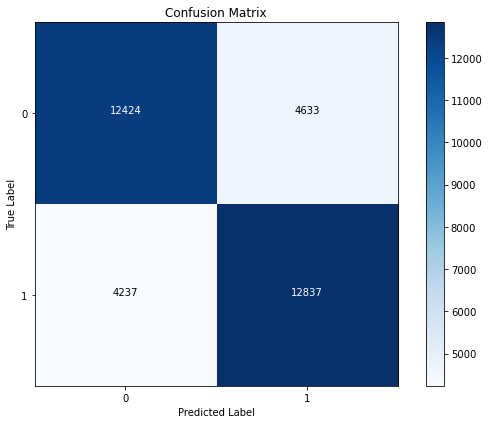

In [50]:
#tuned KNN
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],  # Range of values for the number of neighbors
    'weights': ['uniform', 'distance'],  # Different weighting schemes
    'metric': ['euclidean', 'manhattan']  # Different distance metrics
}

grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)

y_train_pred = best_knn.predict(X_train_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

precision = precision_score(y_test, y_test_pred)
print("Precision: ", precision)
recall = recall_score(y_test, y_test_pred)
print("Recall: ", recall)
f1 = f1_score(y_test, y_test_pred)
print("F1: ", f1)

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['0', '1']  
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")

plt.show()



Training Accuracy: 0.750955889893204
Test Accuracy: 0.7517506079517154
Model Accuracy: 0.751114835367676
Precision: 0.7575303910413798
Recall: 0.7408925852172894
F1 Score: 0.7491191188227282


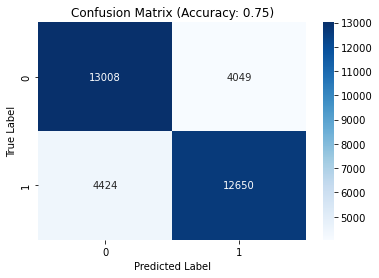

In [27]:
#LogisticRegression 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

overall_accuracy = accuracy_score(y, logreg.predict(X))
print("Model Accuracy:", overall_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Accuracy: {:.2f})".format(test_accuracy))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


c:\Users\elits\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\elits\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\elits\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\elits\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

Tuned Logistic Regression Model:
Train Accuracy: 0.7510657622947218
Test Accuracy: 0.7516334124403036
Precision: 0.7500427034105791
Recall: 0.7715239545507789
F1 Score: 0.760631694430811


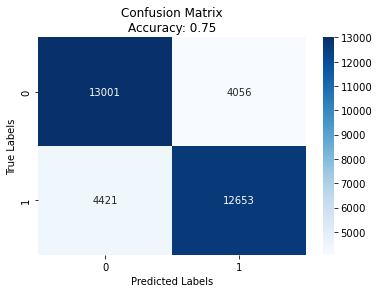

In [52]:
#tuned LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()

param_grid = {'C': [0.1, 1.0, 10.0],
              'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_logreg = LogisticRegression(**best_params)
best_logreg.fit(X_train, y_train)

y_train_pred = best_logreg.predict(X_train)
y_test_pred = best_logreg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Tuned Logistic Regression Model:")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_test_pred)

accuracy = accuracy_score(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

plt.title("Confusion Matrix\nAccuracy: {:.2f}".format(accuracy))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()


In [38]:
#decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

overall_accuracy = accuracy_score(y, dt_model.predict(X))
print("Model Accuracy:", overall_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Training Accuracy: 0.9969675217181113
Test Accuracy: 0.6833963259207172
Model Accuracy: 0.9342525475672857
Precision: 0.6863258026159335
Recall: 0.6761157315216119
F1 Score: 0.6811825101787927


Training Accuracy: 0.7620896265803314
Test Accuracy: 0.761800123055287
Model Accuracy: 0.7620317251967442
Precision: 0.7441847766735831
Recall: 0.7982312287688884
F1 Score: 0.7702611054594777


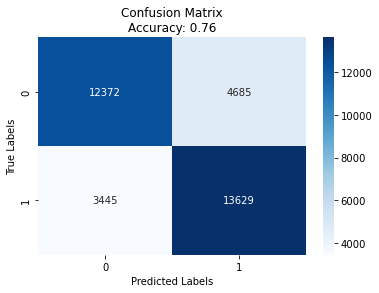

In [53]:
#gradient boosted decision tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

y_train_pred = gb_classifier.predict(X_train)
y_test_pred = gb_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

overall_accuracy = accuracy_score(y, gb_classifier.predict(X))
print("Model Accuracy:", overall_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_test_pred)

accuracy = accuracy_score(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

plt.title("Confusion Matrix\nAccuracy: {:.2f}".format(accuracy))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Training Accuracy: 0.9969528720645757
Test Accuracy: 0.7561454396296622
Model Accuracy: 0.9487908211399741
Precision: 0.7497288967524685
Recall: 0.7693569169497482
F1 Score: 0.7594161005925711


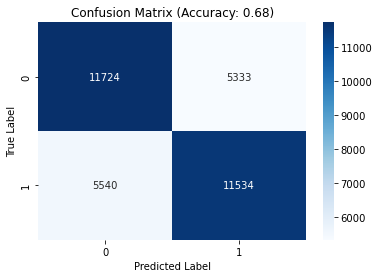

In [41]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

overall_accuracy = accuracy_score(y, rf_model.predict(X))
print("Model Accuracy:", overall_accuracy)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Accuracy: {:.2f})".format(accuracy))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



Training Accuracy: 0.9969528720645757
Test Accuracy: 0.7569072104538396
Accuracy: 0.7569072104538396
Precision: 0.7489364115945317
Recall: 0.7732810120651282
F1 Score: 0.7609140420136586


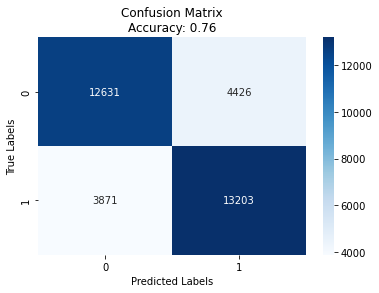

In [54]:
#tuned randomforest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['auto']
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_classifier = RandomForestClassifier(**best_params)

best_rf_classifier.fit(X_train, y_train)

y_pred = best_rf_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, best_rf_classifier.predict(X_train))
print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

plt.title("Confusion Matrix\nAccuracy: {:.2f}".format(accuracy))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()




In [16]:
!pip install xgboost

In [17]:
# gradient boosting model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7622103073452287
Precision: 0.7529079616036137
Recall: 0.7809534965444536
F1 Score: 0.7666743330266789


In [19]:
#Tuned Gradient Boosting model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

gb_classifier = GradientBoostingClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [100],
    'max_depth': [3]
}

grid_search = GridSearchCV(gb_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_gb_classifier = GradientBoostingClassifier(**best_params)
best_gb_classifier.fit(X_train, y_train)

y_pred = best_gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7358413172775483
Precision: 0.7228429203539823
Recall: 0.765432821834368
F1 Score: 0.7435284747112704


In [20]:
#SVM model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_small)
X_test_pca = pca.transform(X_test)

svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train_pca, y_train_small)

y_pred = svm_classifier.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7592804195599309
Precision: 0.7459189339255969
Recall: 0.7868103549256179
F1 Score: 0.7658191768327444


In [21]:
#tuned SVM
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

df34_small = df34_clean.sample(frac=0.5, random_state=42)

X = df34_small.drop('label', axis=1)
y = df34_small['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

param_grid = {
    'C': [1],
    'gamma': ['scale'],
    'kernel': ['rbf']
}

svm_classifier = SVC(random_state=42)

grid_search = GridSearchCV(svm_classifier, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

best_params = grid_search.best_params_

best_svm_classifier = SVC(**best_params)
best_svm_classifier.fit(X_train_pca, y_train)

y_pred = best_svm_classifier.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7329778506972928
Precision: 0.7233971874653969
Recall: 0.7603584729981379
F1 Score: 0.7414174658117233
